### Q1  
Train a Perceptron is a fundamentalbuilding block for neural  networks. Let  us  try  to train  a  single perceptron. Consider the data given in the following table. As one can see,it has two attributes x1,x2 and a class label (either 0 or 1).
1. Implement the perceptron training ruleand  get  the  appropriate parameters fora single perceptron.
2. Plot the data points and the obtained  decision  boundary.
3. Also draw the schematic diagram of the trained perceptron with learned weights. You can draw this on paper and attach a photo.

In [1]:
# Create the perceptron class with required variables and fit,predict and activation functions
class perceptron:
    def __init__(self,learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        n_samples,n_features = X.shape
        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        for x in range(self.n_iters):
            for idx,x_i in enumerate(X):
                linear_output = np.dot(x_i,self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                update = self.lr*(y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self,X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    
    def _unit_step_func(self,x):
        return np.where(x>=0, 1, 0)

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def accuracy(y_true,y_pred):
    accuracy = np.sum(y_true == y_pred)/ len(y_true)
    return accuracy

In [4]:
# Create numpy arrays from data
X1 = [-3.98,-3.464,-3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]
X2 = [-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]
y = np.array([1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1])
X = np.array(list(zip(X1,X2)))

In [16]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
p = perceptron(learning_rate=0.01, n_iters=1000)

In [18]:
# Fit the model
p.fit(X_train, y_train)

In [19]:
predictions = p.predict(X_test)

In [20]:
predictions

array([1, 0, 0, 0, 0])

In [21]:
# Display accuracy
print("Perceptron classification accuracy = ",accuracy(y_test,predictions))

Perceptron classification accuracy =  0.6


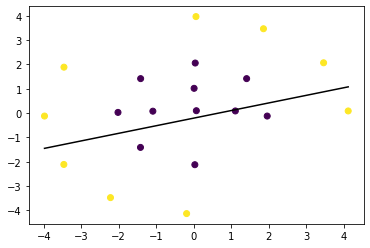

In [22]:
# Plot the data points and the obtained  decision  boundary.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train)
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1,x0_2],[x1_1,x1_2],'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])

plt.show()

In [23]:
p.weights

array([-0.01519,  0.04867])

In [24]:
p.bias

0.010000000000000004

In [25]:
# Schematic diagram of the trained perceptron with learned weights

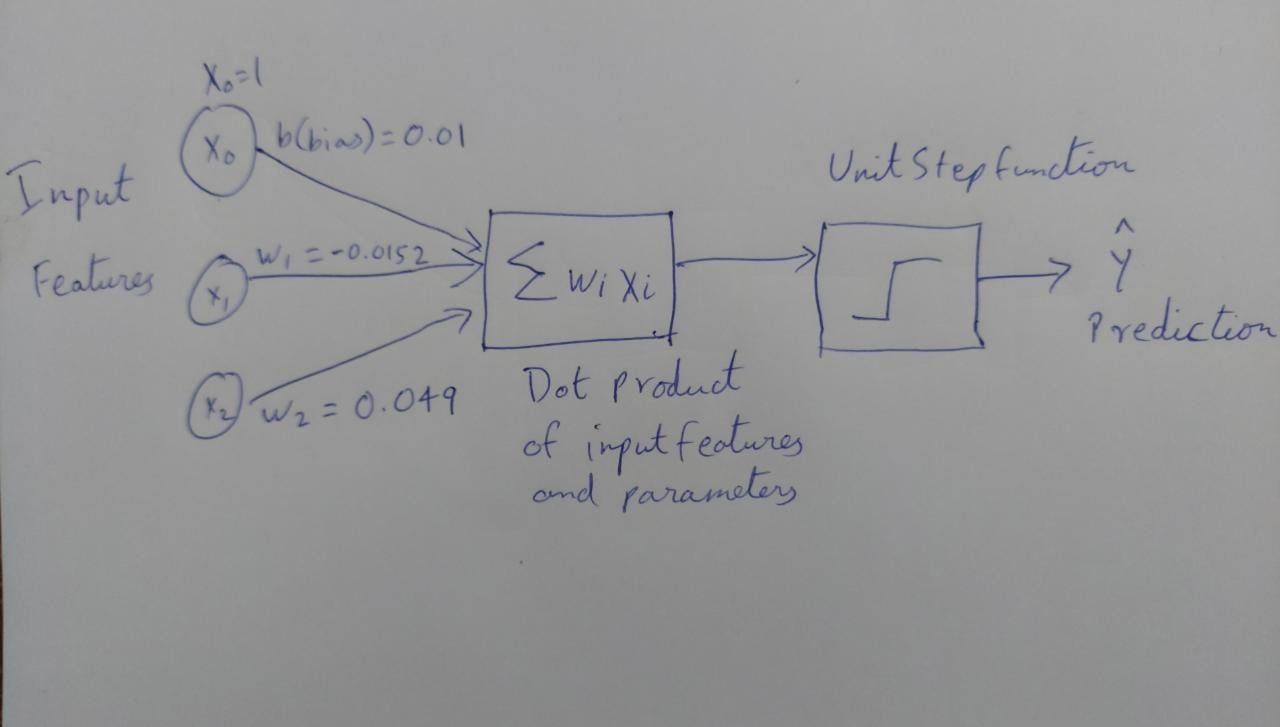

### Q2
Train a Neural Network. Let us design a neural network to classify flowers from Iris dataset.
1. Implement a single hidden layer MLP.  Final output layer will have 3 neurons,one for each result. Arch: [Input, hidden,output]
2. Now use an NN with two hidden layers. The first hidden layer has 8 neurons.The second hidden layer has 4 neurons. The third hidden layerhas 4 neurons . Arch: [Input,hidden1,hidden2,hidden3,output]

(i)  Use keras or any other framework to design the NN model and train onthe iris data.

(ii) Draw  the  schematic diagram of the NN along with all the weights and specify a suitable activation function. 
How many trainable parameters are there?

In [28]:
# Import data
df = pd.read_csv('iris.data', names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'])

In [30]:
# Get features and target dataframes
X = df_iris.drop('Species',axis=1).values
y = df_iris['Species'].values

In [80]:
# Preprocess the data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# encode the target data
encoder = OneHotEncoder()
Y = encoder.fit_transform(y[:, np.newaxis]).toarray()

# Standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Implement a single hidden layer MLP.

In [87]:
# create an mlp classifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,), random_state=1)

In [88]:
# fit mlp classifier
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3,), random_state=1,
              solver='lbfgs')

In [89]:
# predict and print accuracy
prediction = mlp.predict(X_test)
print('The accuracy is:',accuracy_score(prediction,Y_test))

The accuracy is: 0.7333333333333333


### NN with 3 hidden layers

In [91]:
# Import tensorflow libraries
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [92]:
NN = models.Sequential()

# Create the input layer with 4 nodes and activation function relu.
NN.add(layers.Dense(4, activation='relu', input_shape= (4,)))

# Create the 1st hidden layer with 8 nodes and activation function relu.
NN.add(layers.Dense(8, activation='relu'))

# Create the 2nd hidden layer with 4 nodes and activation function relu.
NN.add(layers.Dense(4, activation='relu'))

# Create the 3rd hidden layer with 4 nodes and activation function relu.
NN.add(layers.Dense(4, activation='relu'))

# Create the output layer with 3 nodes and activation function softmax.
NN.add(layers.Dense(3, activation='softmax'))

NN.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [99]:
out = NN.fit(X_train, Y_train, batch_size=5, epochs=100, verbose=0, validation_data=(X_test, Y_test))

In [100]:
# Print training loss and accuracy
print('Final training loss \t', out.history['loss'][-1])
print('Final training accuracy ', out.history['accuracy'][-1])

Final training loss 	 0.08777093142271042
Final training accuracy  0.9750000238418579


In [102]:
# Print test loss and accuracy
testLoss, testAccuracy = NN.evaluate( X_test, Y_test)
print('Final testing loss \t', testLoss)
print('Final testing accuracy ', testAccuracy)

1/1 [==============================] - 0s 18ms/step - loss: 0.0474 - accuracy: 1.0000
Final testing loss 	 0.04738630726933479
Final testing accuracy  1.0


In [103]:
# Display number of trainable parameters
NN.count_params()

131

In [121]:
for layer_number, layer in enumerate(NN.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    
    if (layer_number > 0):
        print("\nBiases of Layer",layer_number+1,"\n")

        for out_node_number, bias in enumerate(biases):
            print("Bias for node",out_node_number+1,"in layer",layer_number+1, "=",bias)
    
    if (layer_number > 0 and layer_number < 5):
        print("\nWeights from Layer",layer_number,"to",layer_number+1,"\n")

        for in_node_number, weight_in in enumerate(weights):
            for out_node_number, weight_out in enumerate(weight_in):
                print("Weight of Layer",layer_number,"node",in_node_number+1,"to Layer",layer_number+1,"node",out_node_number+1,"=",weight_out)


Biases of Layer 2 

Bias for node 1 in layer 2 = 0.0
Bias for node 2 in layer 2 = 0.0
Bias for node 3 in layer 2 = 0.3081489
Bias for node 4 in layer 2 = -0.1983389
Bias for node 5 in layer 2 = 0.0
Bias for node 6 in layer 2 = 0.0
Bias for node 7 in layer 2 = 0.0
Bias for node 8 in layer 2 = 0.19382727

Weights from Layer 1 to 2 

Weight of Layer 1 node 1 to Layer 2 node 1 = -0.5271684
Weight of Layer 1 node 1 to Layer 2 node 2 = -0.35879022
Weight of Layer 1 node 1 to Layer 2 node 3 = 0.2125985
Weight of Layer 1 node 1 to Layer 2 node 4 = 0.24120332
Weight of Layer 1 node 1 to Layer 2 node 5 = -0.18702781
Weight of Layer 1 node 1 to Layer 2 node 6 = -0.53365463
Weight of Layer 1 node 1 to Layer 2 node 7 = 0.0763458
Weight of Layer 1 node 1 to Layer 2 node 8 = 0.43931025
Weight of Layer 1 node 2 to Layer 2 node 1 = -0.30054983
Weight of Layer 1 node 2 to Layer 2 node 2 = -0.23402679
Weight of Layer 1 node 2 to Layer 2 node 3 = -0.5073529
Weight of Layer 1 node 2 to Layer 2 node 4 = 0.

### Schematic diagram of the Neural Network

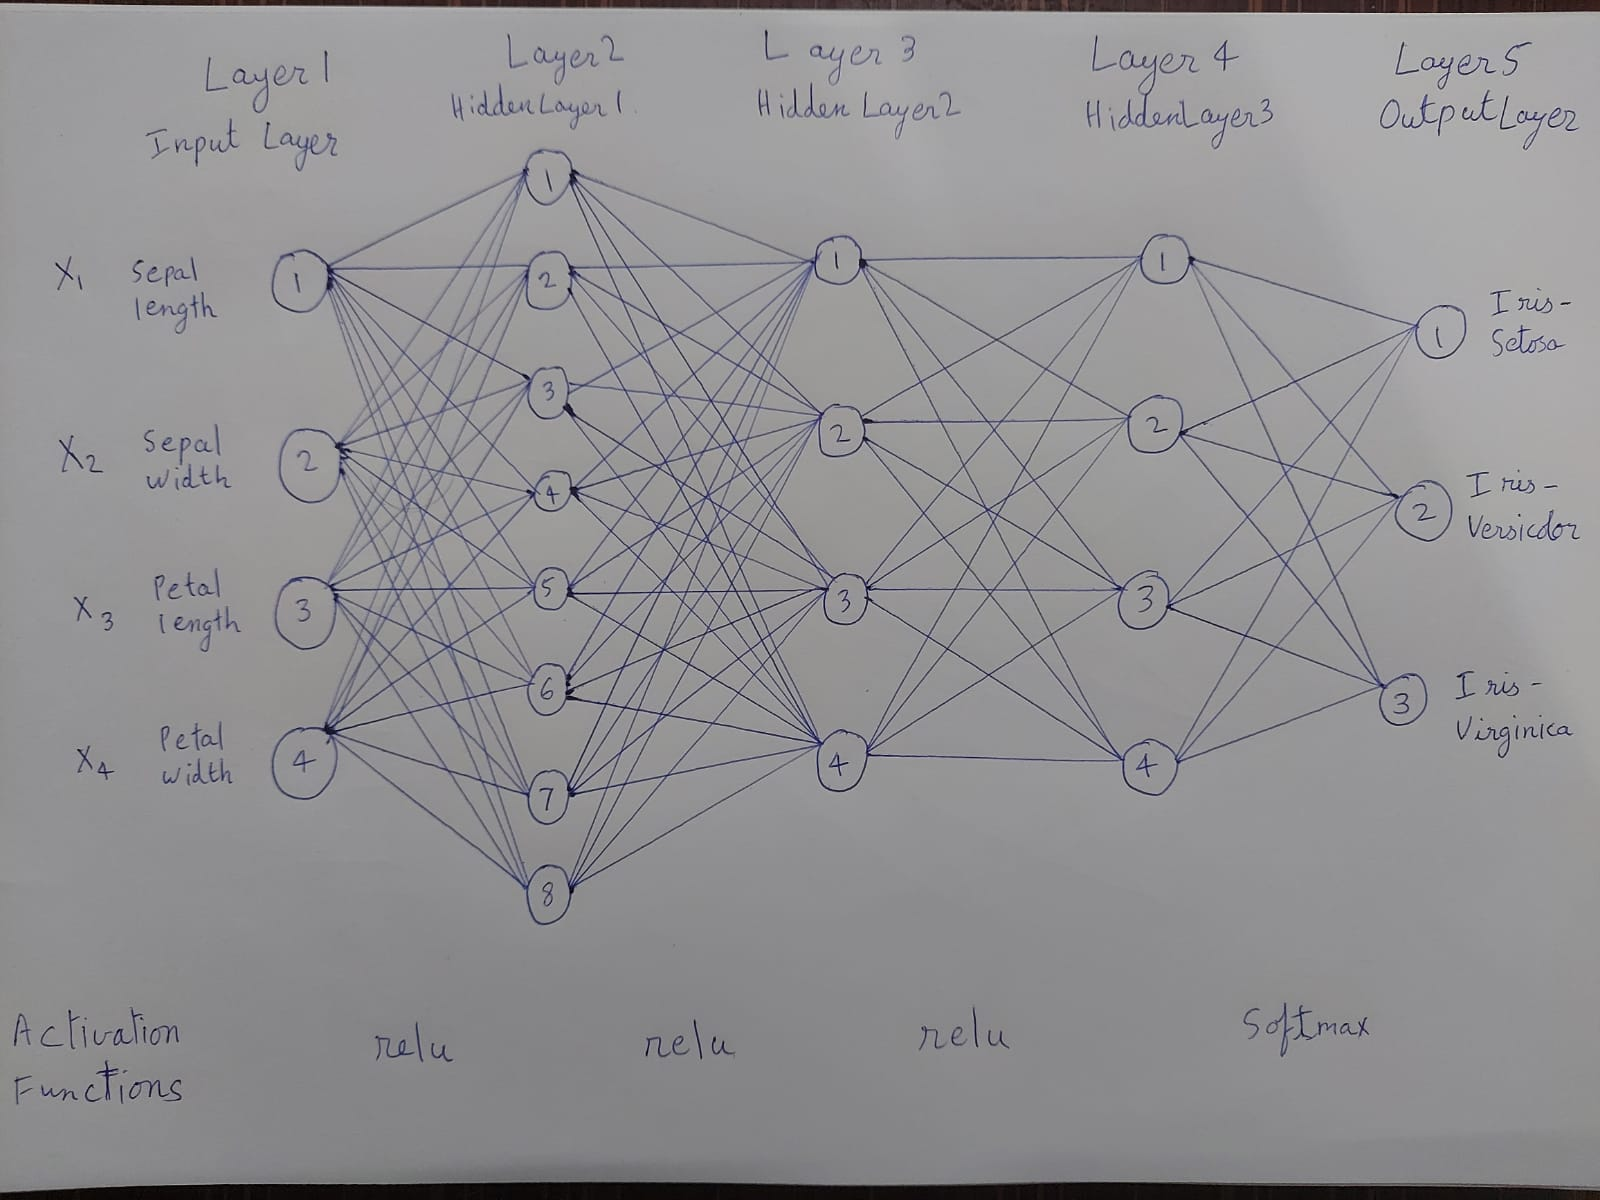